Karen Gong

Partner: Harrison Robel

PHYS 434 AA Lab 6

In [6]:
%matplotlib inline
# import library
#import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
#import h5py
#from sklearn import preprocessing

plt.rcParams["figure.figsize"] = (20,15)

First, we want to have some 'background' data (presumably signal free) onto which we can inject a simulated signal. So the first step is to isolate some appropriate data from your data files. 

For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

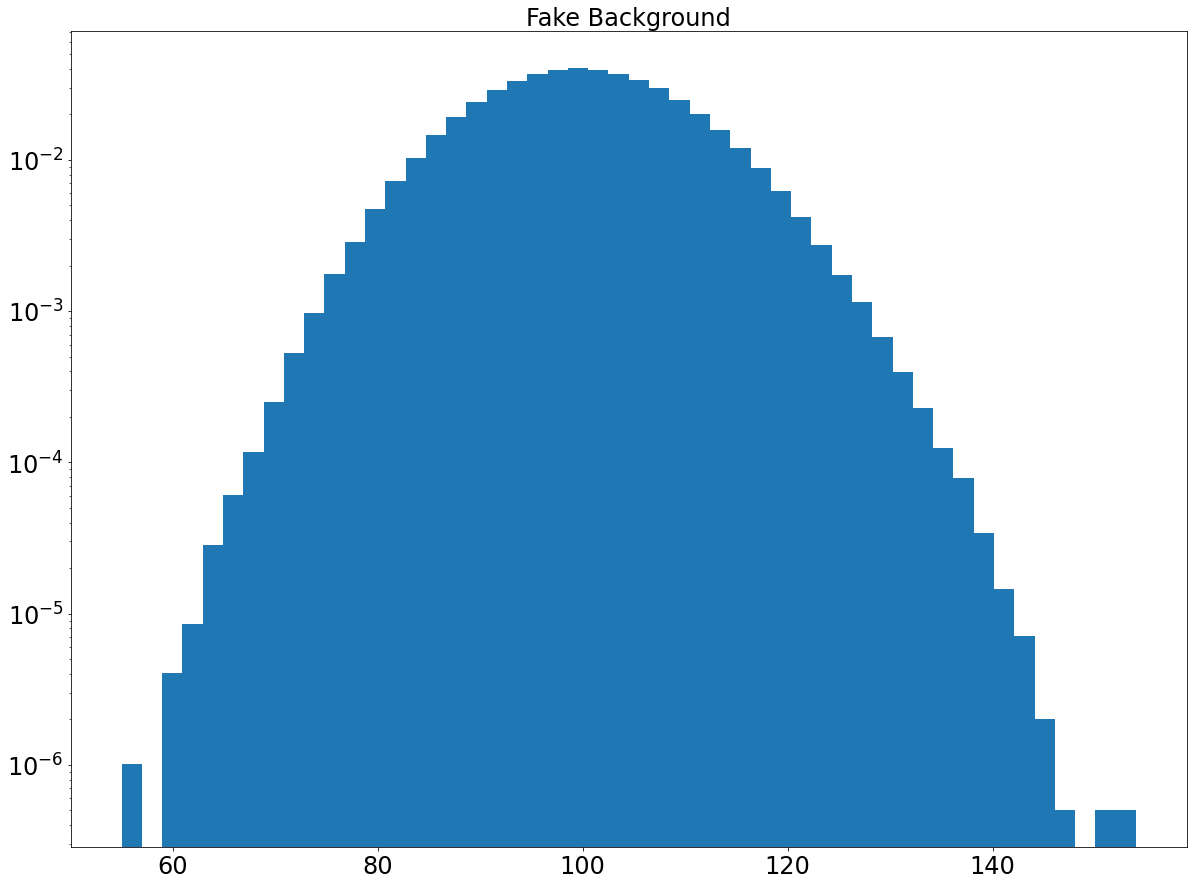

In [30]:
fake = stats.poisson.rvs(mu = 100, size = 1000000)

fig, ax = plt.subplots(1, 1)
ax.hist(fake,50, density=True)
plt.tick_params(labelsize = 24)
plt.title("Fake Background", size = 24)
plt.yscale('log')
plt.show()

Problem 1

The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. (Hint, you've done this several times now, look back at the first few labs.)

In [26]:
#prob5sig = 1/3.5e6
prob5sig = stats.norm.cdf(5)

#lower
sigma = stats.poisson.ppf(1 - prob5sig, 100)
print("The lower 5σ sensitivity threshold is", sigma)

#upper
sigma2 = stats.poisson.ppf(prob5sig, 100)
print("The upper 5σ sensitivity threshold is", sigma2)

The lower 5σ sensitivity threshold is 54.0
The upper 5σ sensitivity threshold is 154.0


The 5σ sensitivity threshold is outside of the interval 54 to 154 counts. 

Problem 2

Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. (Use a signal of 8σ.) Inject this signal into your background data many times.

In [69]:
prob8sig = stats.norm.cdf(8)

sig = stats.poisson.ppf(1 - prob8sig, 100)
print(sig)

inject = fake + sig

32.0


a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

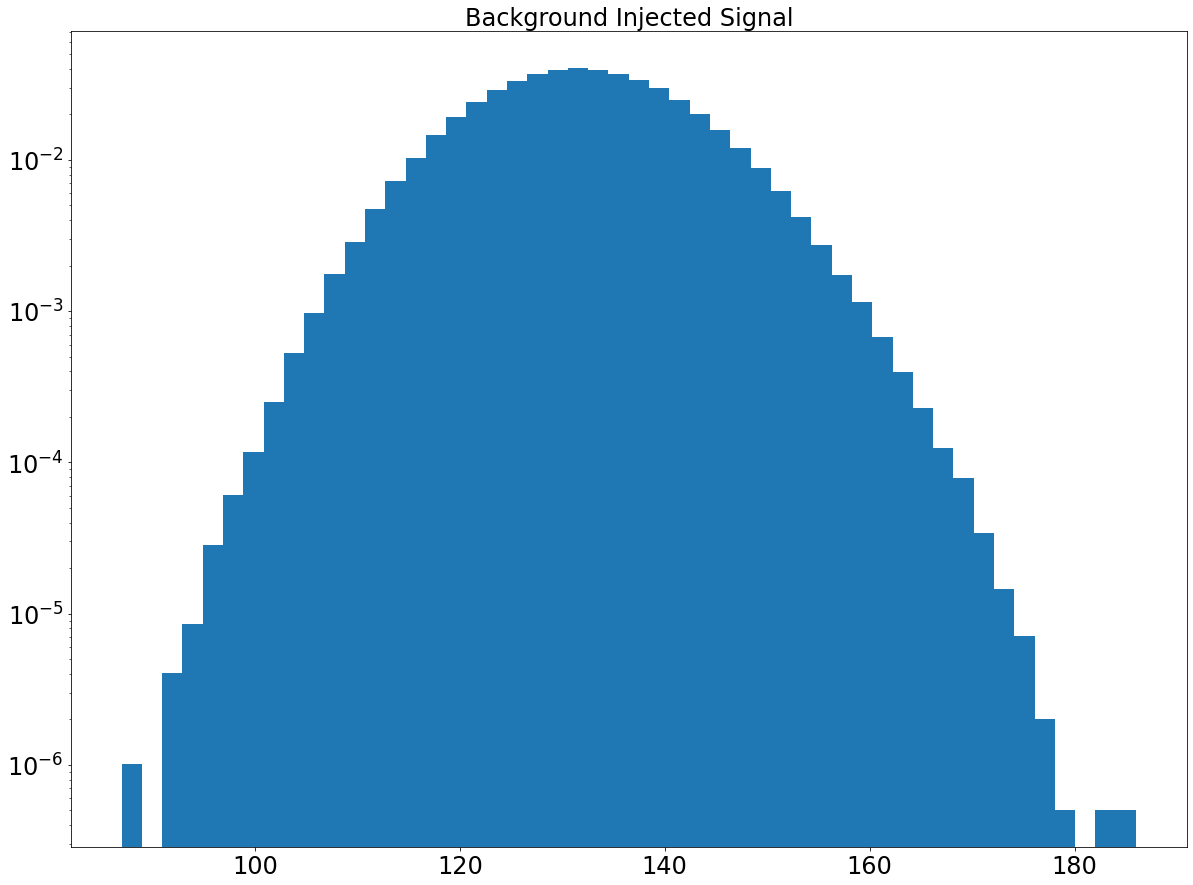

In [72]:
fig, ax = plt.subplots(1, 1)
ax.hist(inject,50, density=True)
plt.tick_params(labelsize = 24)
plt.title("Background Injected Signal", size = 24)
plt.yscale('log')
plt.show()

It has the same shape, it's just shifted up by 32 points.

b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

The observed signal is biased -- yes the observed value is more likely to be stronger than the true injected signal -- always. 
If you had a zero-mean gaussian, symmetric around zero. If there were some negative values, you could have observed signal less than the actual signal.

It's not symmetric but it looks like it is. -- Because we have a high mean, the graph is close to being symmetric (normal) even though it's not. It's actually skewed a little to the left

Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data